In [1]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
N = 100
P = 10
X = np.random.randn(N, P)
true_beta = np.array([3, 5, -2] + [0]*(P-3))
y = X @ true_beta + np.random.randn(N)


In [2]:
from sklearn.preprocessing import StandardScaler

# Standardize the predictors
scaler_X = StandardScaler()
X_standardized = scaler_X.fit_transform(X)

# Standardize the response
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


In [3]:
from sklearn.cross_decomposition import PLSRegression

# Fit the PLS model
n_components = 3
pls = PLSRegression(n_components=n_components)
pls.fit(X_standardized, y_standardized)


PLSRegression(n_components=3)

In [4]:
# Predict on the training data
y_pred_standardized = pls.predict(X_standardized).flatten()

# Convert predictions back to original scale
y_pred = scaler_y.inverse_transform(y_pred_standardized.reshape(-1, 1)).flatten()


Mean Squared Error: 0.8698444362290664


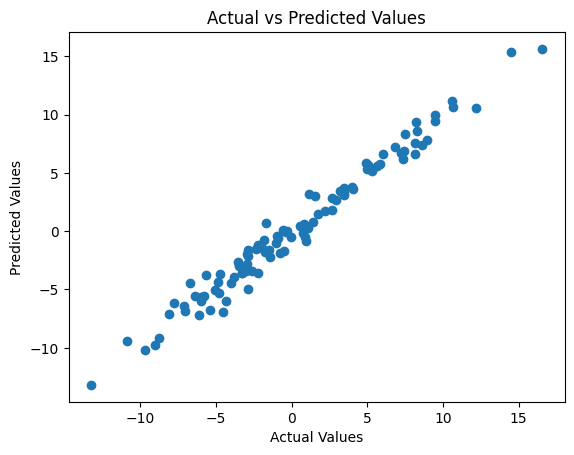

In [5]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
import matplotlib.pyplot as plt

plt.scatter(y, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
